In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
X = df.drop("quality", 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
X = X.values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
y1 = df['quality'].values
y1

array([5, 5, 5, ..., 6, 5, 6])

In [7]:
X.shape #(jumlah wine, feauture)

(1599, 11)

In [8]:
y1.shape

(1599,)

### Preprocessing dengan Binary class

In [9]:
mid = lambda m : lambda a : a <= m

In [10]:
mid_5 = mid(5)

In [11]:
mid_6 = mid(6)

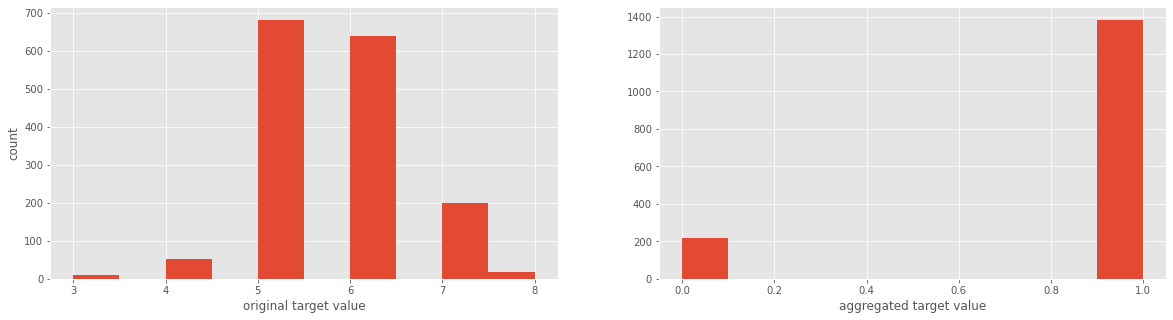

In [12]:
y = mid_6(y1)

y = y.astype("float32") #mengubah dari bool ke float

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

## Split data untuk data training dengan ratio 20% / 80 : 20

keterangan : 
    test_size = 0.2 ---> mengambil 20% dari data untuk data testing

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(1279, 11)

In [15]:
X_test.shape

(320, 11)

### Proses Training dengan neighbors = 3

In [16]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn.fit(X_train, y_train) # param 1 = feature , param 2 = target variabel

### Mengecek akurasi training diatas

In [17]:
knn_result_1 = knn_model_1.score(X_test, y_test) # membandingkan dengan testing data
print(f'akurasi : {knn_result_1}')

akurasi : 0.85


### Mengecek report dari training diatas

In [18]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.34      0.40        47
         1.0       0.89      0.94      0.91       273

    accuracy                           0.85       320
   macro avg       0.69      0.64      0.66       320
weighted avg       0.83      0.85      0.84       320



### Mengecek data yang salah meggunakan confusion metric

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 16,  31],
       [ 17, 256]])

### KNN = 7

In [20]:
knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_model_2 = knn_7.fit(X_train, y_train)
knn_res_k7 = knn_model_2.score(X_test, y_test)

In [21]:
knn_res_k7

0.840625

In [22]:
knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11)
knn_model_3 = knn_11.fit(X_train, y_train)
knn_res_k11 = knn_model_3.score(X_test, y_test)

In [23]:
knn_res_k11

0.85

In [24]:
knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_model_4 = knn_15.fit(X_train, y_train)
knn_res_k15 =  knn_model_4.score(X_test, y_test)

In [25]:
knn_res_k15

0.85

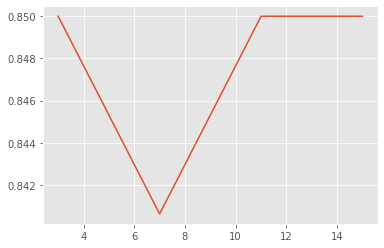

In [26]:
plt.plot([3,7,11,15], [knn_result_1, knn_res_k7, knn_res_k11, knn_res_k15])